In [1]:
#the purpose of this notebook is to process data of lists of residues within 5 angstroms (collected by pymol) and determine which residues are nearby and could interact with said residues

In [6]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
#!pip install itertools

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from itertools import combinations
import matplotlib.patches as mpatches

In [8]:
#Read the CSV file
df = pd.read_csv("residues_within_5_angstroms_of_antagonist_ligands.csv")

In [9]:
df

,Suvorexant,EMPA,Lemborexant,HTL6641,PV-006710095262
0,ASN324,ASN324,ALA110,ASN324,ARG328
1,ASP115,ASP115,ASN324,CYS107,ASN324
2,CYS210,ASP211,ASP115,CYS210,ASP115
3,GLN134,CYS107,CYS107,GLN134,ASP211
4,GLN187,CYS210,GLN134,GLN187,CYS210
5,GLU212,GLN134,GLN187,GLU212,GLN134
6,HIS224,GLN187,GLU212,HIS224,GLU118
7,HIS350,GLU212,HIS350,HIS350,HIS350
8,ILE130,HIS224,ILE130,ILE130,ILE130
9,ILE320,HIS350,ILE320,ILE320,ILE320


In [10]:
# Flatten all interactions into a unique residue list
all_residues = set(df.stack())
binary_matrix = pd.DataFrame(0, index=sorted(all_residues), columns=df.columns)

In [11]:
# Populate the binary matrix
for drug in df.columns:
    residues = df[drug].dropna().unique()  # Get unique residues for each drug
    binary_matrix.loc[residues, drug] = 1

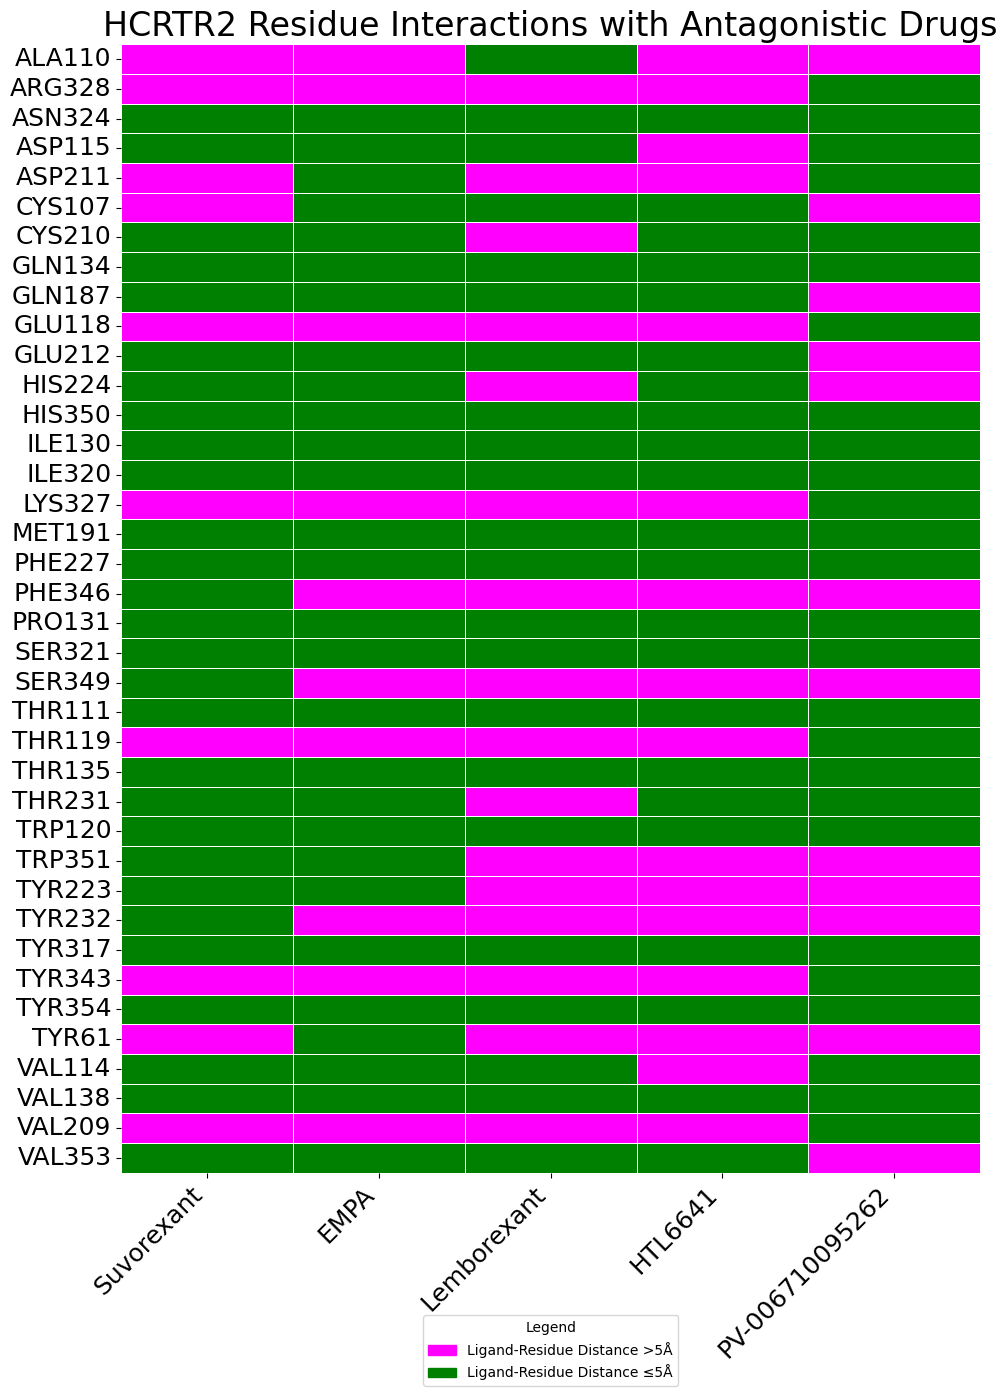

In [58]:
# Step 3: Plot the heatmap
plt.figure(figsize=(10, 14))

magenta_green_cmap = LinearSegmentedColormap.from_list(
    "magenta_green", ["magenta", "white", "green"]
)

sns.heatmap(binary_matrix, cmap=magenta_green_cmap, cbar=False, annot=False, linewidths=0.5)
plt.title("HCRTR2 Residue Interactions with Antagonistic Drugs", fontsize=24)
#plt.xlabel("Drugs", fontsize=14)
#plt.ylabel("Residues", fontsize=14)
#plt.xticks(rotation=0, ha="center")
plt.xticks(rotation=45, ha="right", fontsize=18)
plt.yticks(rotation=0, ha="right", fontsize=18)

low = mpatches.Patch(color="magenta", label="Ligand-Residue Distance >5Å")
high = mpatches.Patch(color="green", label="Ligand-Residue Distance ≤5Å")

# Add legend
plt.legend(handles=[low, high], title="Legend", loc="upper center", bbox_to_anchor=(0.5, -0.12))

plt.tight_layout()
plt.show()

In [41]:
#now, get similarity of drug modes and calculate jaccard similarity
drug_residues = {drug: set(df[drug].dropna()) for drug in df.columns}

drugs = list(drug_residues.keys())
similarity_matrix = pd.DataFrame(0.0, index=drugs, columns=drugs)

In [42]:
for drug1, drug2 in combinations(drugs, 2):
    residues1 = drug_residues[drug1]
    residues2 = drug_residues[drug2]
    # Jaccard similarity
    jaccard = len(residues1 & residues2) / len(residues1 | residues2)
    similarity_matrix.loc[drug1, drug2] = jaccard
    similarity_matrix.loc[drug2, drug1] = jaccard

In [43]:
# Fix diagonal values (self-comparison should be 1; it is 0 otherwise)
for drug in drugs:
    similarity_matrix.loc[drug, drug] = 1.0

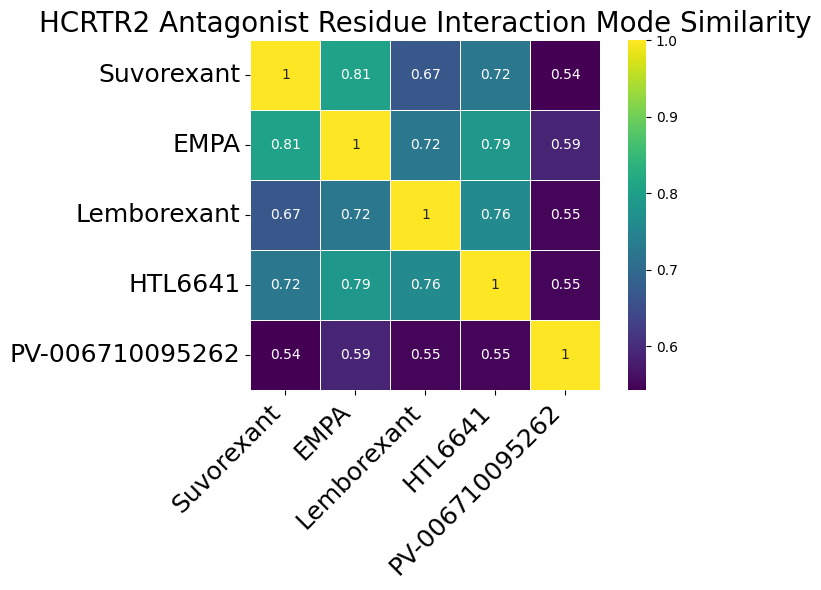

In [60]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap="viridis", annot=True, cbar=True, square=True,
            linewidths=0.5, linecolor="white")
plt.title("HCRTR2 Antagonist Residue Interaction Mode Similarity", fontsize=20)
#plt.xlabel("Drugs", fontsize=14)
#plt.ylabel("Drugs", fontsize=14)

plt.xticks(rotation=45, ha="right", fontsize=18)
plt.yticks(rotation=0, ha="right", fontsize=18)

plt.tight_layout()
plt.show()